In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Importa o conjunto de dados Iris e o classificador de árvore de decisão
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Carrega o dataset Iris. O resultado é um objeto do tipo "Bunch" (semelhante a um dicionário)
iris = load_iris()

# Imprime as chaves disponíveis no objeto do dataset (como 'data', 'target', 'feature_names', etc.)
print("iris dataset keys: ", iris.keys())

# Mostra os nomes das classes-alvo (espécies das flores)
print('iris["target_names"]: ', iris['target_names'])

# Mostra os valores dos alvos (0, 1 ou 2 representando as espécies)
print("iris['target'] = ", iris['target'])

# Mostra o número de exemplos no conjunto de dados (ou seja, o número de alvos)
print("target lenght: ", len(iris['target']))

# Mostra os nomes das variáveis de entrada (características das flores)
print("iris['feature_names: ']", iris['feature_names'])

# Mostra todas as características do primeiro exemplo (primeira flor)
print("iris['data'][0,:] = ", iris.data[0,:])

# Mostra somente as duas últimas características (largura e comprimento da pétala) do primeiro exemplo
print("iris['data'][0, 2:] = ", iris.data[0,2:])

iris dataset keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris["target_names"]:  ['setosa' 'versicolor' 'virginica']
iris['target'] =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target lenght:  150
iris['feature_names: '] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris['data'][0,:] =  [5.1 3.5 1.4 0.2]
iris['data'][0, 2:] =  [1.4 0.2]


In [3]:
# Carrega o dataset Iris do scikit-learn, que contém dados sobre flores de três espécies de Iris
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Carrega o dataset Iris
iris = load_iris()

# Seleciona as duas últimas colunas (comprimento e largura da pétala) como características (X)
X = iris.data[:, 2:]  # As colunas 2 e 3 do dataset correspondem ao comprimento e largura da pétala

# A variável alvo (y) corresponde às classes (espécies) das flores no dataset
y = iris.target  # Contém os rótulos de classe para as flores (Setosa, Versicolor, Virginica)

# Cria um classificador de árvore de decisão com profundidade máxima igual a 2
# Isso restringe a árvore a não se expandir além de dois níveis de divisão
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Treina o modelo (árvore de decisão) usando as características (X) e os alvos (y)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

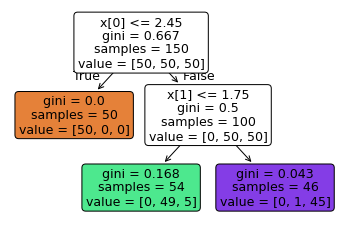

In [4]:
# Importa a função plot_tree do scikit-learn para visualizar a árvore de decisão
from sklearn.tree import plot_tree

# Gera a visualização da árvore de decisão
# O argumento 'filled=True' colore os nós com base na classe predominante
# O argumento 'rounded=True' arredonda os cantos das caixas para um visual mais agradável
plot_tree(tree_clf, filled=True, rounded=True)

# Exibe o gráfico da árvore de decisão
plt.show()

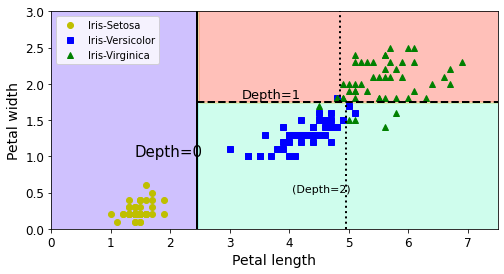

In [5]:
## Script para visualização das fronteiras de decisão de uma árvore de decisão

# Importa o mapa de cores para personalizar a visualização
from matplotlib.colors import ListedColormap

# Função que plota a fronteira de decisão do classificador
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # Gera um conjunto de valores para as variáveis x1 e x2 (dentro dos limites especificados em axes)
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    # Cria uma grade de pontos a partir de x1s e x2s para prever as classes em todos os pontos da área
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # Previsões do classificador (clf) para os pontos na grade
    y_pred = clf.predict(X_new).reshape(x1.shape)
    # Cria um mapa de cores customizado para a visualização
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    # Plota o preenchimento da região de decisão (contorno preenchido) com a cor correspondente à classe prevista
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap='rainbow')
    # Se não for o conjunto de dados Iris, plota as linhas de contorno das fronteiras de decisão
    if not iris:
        plt.contour(x1, x2, y_pred, cmap='rainbow', alpha=0.8)
    # Se plot_training for True, plota os pontos de treinamento
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)  # Ajusta os limites dos eixos de acordo com os parâmetros
    # Define os rótulos dos eixos X e Y se for o conjunto de dados Iris
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r" ", fontsize=18)  # Rótulo vazio caso não seja Iris
        plt.ylabel(r" ", fontsize=18, rotation=0)  # Rótulo vazio para o eixo Y
    # Se legend for True, exibe a legenda com as classes
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Cria a figura com o tamanho especificado
plt.figure(figsize=(8, 4))
# Plota as fronteiras de decisão da árvore de decisão utilizando a função definida acima
plot_decision_boundary(tree_clf, X, y)
# Plota manualmente as linhas de decisão da árvore (nós da árvore)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)  # Linha sólida para o nó de profundidade 0
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)  # Linha tracejada para o nó de profundidade 1
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)  # Linha pontilhada para o nó de profundidade 2
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)  # Outra linha pontilhada para o próximo nível
# Adiciona texto explicativo sobre a profundidade da árvore nas posições apropriadas
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
# Adiciona a legenda para as classes de Iris
plt.legend()
# Exibe o gráfico gerado
plt.show()

## Exercício: 

Generalize o script de visualização da tree acima para traçar as retas de decisão para qualquer tree, acessando diretamente os valores de decisão (threshold) do objeto tree_ de treinamento. Você pode utilizar esse script do scikit-learn como exemplo de acesso à estrutura da tree.

No exemplo acima, o depth=0 representa o limite de decisão do root node.

A área da esquerda é pura (Iris-Setosa, gini=0.0, leaf da esquerda na nossa tree), ela não pode ser mais divida.

As áreas da direita são divididas pelo limite de decisão tracejado em negrito (depth=1). Como especificamos no nosso treinamento max_depth=2, essas áreas não podem ser subdivididas.

As linhas tracejadas mais claras representam como as áreas rosa e verde seriam sub-divididas caso tivéssemos permitido que nossa tree tivesse uma profundidade (depth) maior.

In [6]:
tree_clf.predict_proba([[5, 1.5]])
# lembrando que treinamos a tree somente com os atributos de comprimento e largura
# X = iris.data[:, 2:] # petal length and width

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]]) # para prever a classe.
# lembrando que 0: iris-setosa, 1: iris-versicolor, 2: iris-virginica

array([1])

In [8]:
import math
H_i = -(49/54)*math.log(49/54) - (5/54)*math.log(5/54)
print(round(H_i,2))

0.31


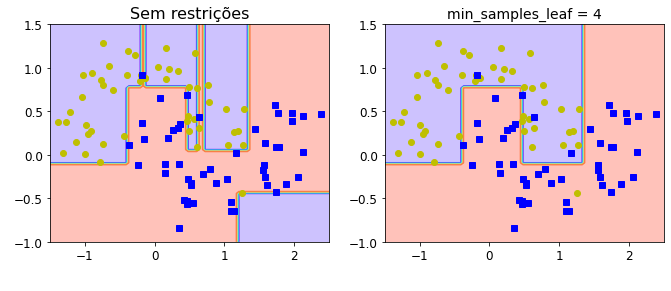

In [9]:
# Importação da função para gerar o conjunto de dados "make_moons"
from sklearn.datasets import make_moons

# Geração de um conjunto de dados de "meia-lua" com 100 amostras e ruído de 0.25
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# Criação de dois modelos de árvore de decisão: um sem restrições e outro com um limite de amostras por folha
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)  # Árvore de decisão sem restrições
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)  # Árvore com restrição de 4 amostras por folha

# Treinamento das árvores de decisão com os dados Xm e ym
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# Criação da figura para exibir os gráficos
plt.figure(figsize=(11, 4))

# Primeira subfigura: árvore sem restrições (sem limitação de amostras por folha)
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)  # Plota as fronteiras de decisão da árvore sem restrições
plt.title("Sem restrições", fontsize=16)  # Título para a primeira subfigura

# Segunda subfigura: árvore com restrição de amostras por folha (min_samples_leaf=4)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)  # Plota as fronteiras de decisão da árvore com restrição
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)  # Título com o valor de min_samples_leaf

# Exibe o gráfico gerado
plt.show()

In [10]:
def quadratic_plus_noise(m = 200):
  """
  Quadratic training set + noise
    m: number of samples
  """
  np.random.seed(42)
  X = np.random.rand(m, 1)
  y = 4 * (X - 0.5) ** 2
  y = y + np.random.randn(m, 1) / 10
  return X, y

X, y = quadratic_plus_noise()

In [11]:
# Importação do DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Criação de um modelo de regressão de árvore de decisão com profundidade máxima de 2
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

# Ajustando o modelo com os dados X (características) e y (target)
tree_reg.fit(X, y)

# Impressão dos limiares de decisão usados em cada nó da árvore
print(tree_reg.tree_.threshold)

[ 0.19734927  0.09169627 -2.         -2.          0.77175754 -2.
 -2.        ]


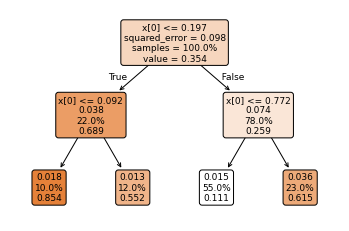

In [12]:
# Visualizar a árvore de decisão com o método plot_tree
plot_tree(tree_reg, filled=True, rounded=True, fontsize=9, proportion=True, label="root")

# Exibir a visualização
plt.show()

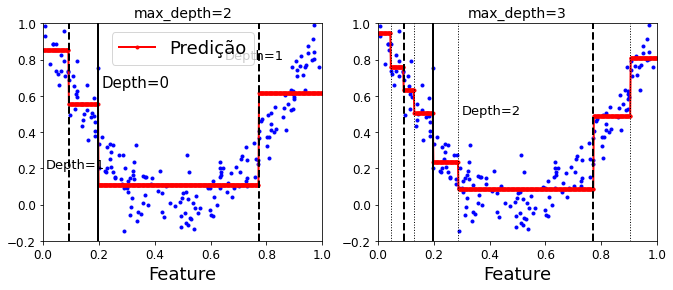

In [13]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Criação de dois modelos de árvore de regressão com diferentes profundidades
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)  # Árvore com profundidade 2
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)  # Árvore com profundidade 3

# Treinamento das árvores com os dados de entrada X e y
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Função para plotar as predições de regressão feitas pela árvore
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel=""):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)  # Geração de valores para o eixo X
    y_pred = tree_reg.predict(x1)  # Previsão da árvore para os valores de X
    plt.axis(axes)  # Define os limites do gráfico
    plt.xlabel("Feature", fontsize=18)  # Rotulando o eixo X
    if ylabel:  # Se o parâmetro ylabel for passado, define o rótulo do eixo Y
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")  # Plota os pontos de dados reais
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"Predição")  # Plota a linha de predição da árvore

# Criação de um gráfico de 2 subgráficos
plt.figure(figsize=(11, 4))

# Subgráfico 1 para a árvore com max_depth=2
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)  # Chama a função para plotar as predições da árvore
# Plota as linhas de divisão nos pontos de split da árvore
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)  # Linha de divisão
plt.text(0.21, 0.65, "Depth=0", fontsize=15)  # Texto para indicar a profundidade do nó
plt.text(0.01, 0.2, "Depth=1", fontsize=13)  # Texto para indicar o nível da árvore
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)  # Adiciona a legenda
plt.title("max_depth=2", fontsize=14)  # Título para o gráfico

# Subgráfico 2 para a árvore com max_depth=3
plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)  # Chama a função para plotar as predições da árvore
# Plota as linhas de divisão para os splits da árvore com max_depth=3
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
# Plota outras linhas de divisão em profundidade maior
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)  # Linhas de divisão em profundidade 2
plt.text(0.3, 0.5, "Depth=2", fontsize=13)  # Texto para indicar a profundidade do nó
plt.title("max_depth=3", fontsize=14)  # Título para o gráfico

# Exibe o gráfico
plt.show()

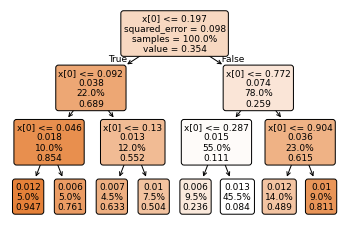

In [14]:
plot_tree(tree_reg2,filled=True,rounded=True, fontsize=9,proportion=True,label="root")
plt.show()

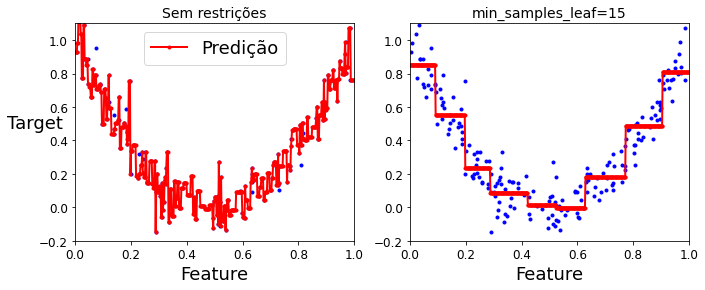

In [15]:
# Criando dois modelos de árvore de regressão com diferentes configurações
tree_reg1 = DecisionTreeRegressor(random_state=42)  # Modelo sem restrições
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=15)  # Modelo com min_samples_leaf=15

# Treinamento dos modelos
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Geração de valores para o eixo X para fazer previsões
x1 = np.linspace(0, 1, 500).reshape(-1, 1)

# Previsões feitas pelos dois modelos para os valores de x1
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

# Criando a figura com dois subgráficos
plt.figure(figsize=(11, 4))

# Subgráfico 1: Árvore sem restrições
plt.subplot(121)
plt.plot(X, y, "b.")  # Plota os dados reais
plt.plot(x1, y_pred1, "r.-", linewidth=2, label="Predição")  # Plota as predições do modelo
plt.axis([0, 1, -0.2, 1.1])  # Define os limites do gráfico
plt.xlabel("Feature", fontsize=18)  # Rótulo do eixo X
plt.ylabel("Target", fontsize=18, rotation=0)  # Rótulo do eixo Y
plt.legend(loc="upper center", fontsize=18)  # Adiciona a legenda
plt.title("Sem restrições", fontsize=14)  # Título do gráfico

# Subgráfico 2: Árvore com min_samples_leaf=15
plt.subplot(122)
plt.plot(X, y, "b.")  # Plota os dados reais
plt.plot(x1, y_pred2, "r.-", linewidth=2, label="Predição")  # Plota as predições do modelo
plt.axis([0, 1, -0.2, 1.1])  # Define os limites do gráfico
plt.xlabel("Feature", fontsize=18)  # Rótulo do eixo X
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)  # Título com min_samples_leaf

# Exibe os gráficos
plt.show()

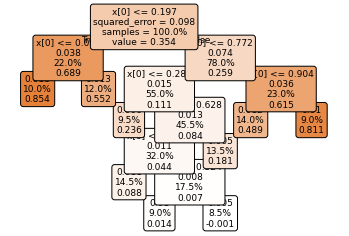

In [16]:
plot_tree(tree_reg2,filled=True,rounded=True, fontsize=9,proportion=True,label="root")
plt.show()

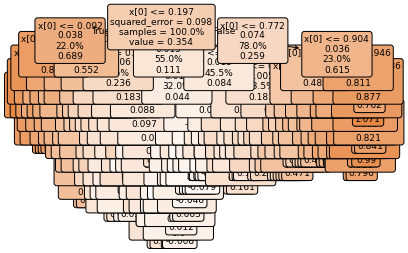

In [17]:
plot_tree(tree_reg1,filled=True,rounded=True, fontsize=9,proportion=True,label="root")
plt.show()

## Exercícios:

Tente diferentes configurações de hyperparâmetros e veja como a Tree se comporta.

Tente outra função e veja como a regressão ainda segue os dados direitinho. (senoidal, cubica, etc)

In [18]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [19]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)
#tree_clf_tweaked.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=40)

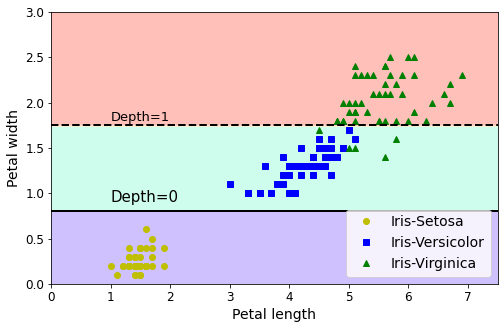

In [20]:
plt.figure(figsize=(8, 5))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=True)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

#save_fig("decision_tree_instability_plot")
plt.show()

## Exercícios (livro, capítulo 6):

Treine e ajuste a Decision Tree do conjunto de dados de "luas" (moon's dataset).

Gere o conjunto de dados de "luas" usando make_moons(n_samples=10000, noise=0.4);

Divida-o em um conjunto de treino e um de teste, usando a função train_test_split();

Use o método de busca com validação cruzada (grid search with cross-validation), com a ajuda da classe GridSearchCV para encontrar bons valores de hyperparâmetros para um DecisionTreeClassifier. Dica: tente diferentes valores para max_leaf_nodes;

Treine o estimador no conjunto de dados completo usando esses hyperparâmetros e meça o desempenho do seu modelo no conjunto de dados de teste. Você deve obter uma acurácia de aproximadamente 85% a 87%.

Faça crescer uma floresta.

Continuando do exercício anterior, gere 1000 sub-conjuntos do conjunto de treinamento, cada sub-conjunto contendo 100 instâncias selecionadas aleatoriamente. Dica: você pode usar a classe do scikit-learn, ShuffleSplit;

Treine uma Decision Tree em cada sub-conjunto, usando os melhores valores de hyperparâmetro encontrados no exercício anterior. Estime o desempenho desses 1000 conjuntos de treinamento no conjunto de teste (como eles foram treinados em um número menor de amostras, a performance será um pouco pior do que a encontrada no exercício anterior, com uma acurácia em torno de 80%);

Para cada instância do conjunto de teste, gere as predições das 1000 Decision Trees e só guarde as predições mais frequentes (você pode usar a função mode() do SciPy). Isso fornece o que é conhecido como majority vote predictions do conjunto de teste;

Estime as predições no conjunto de teste: você deve obteve no conjunto de teste: a acurácia deve ser um pouco maior que a do item anterior (da ordem de 0.5 a 1.5%). Parabéns! Você treinou um classificador Random Forest! :-)